In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('history_cleaned1.csv')
df.shape

(5170, 2)

In [61]:
df = df.rename(columns= {'Date_Time':'Time'})

In [62]:
df.head()

,Time,domain
0,2021-10-02 17:18:47,chrome.google.com
1,2021-10-02 17:18:42,chrome.google.com
2,2021-10-02 17:18:40,www.google.com
3,2021-10-02 17:18:39,www.google.com
4,2021-10-02 17:17:01,pypi.org


In [27]:
df.tail()

,Date&Time,domain
5165,2021-07-09 02:34:02,cgifederal.secure.force.com
5166,2021-07-09 02:33:58,cgifederal.secure.force.com
5167,2021-07-09 02:33:43,cgifederal.secure.force.com
5168,2021-07-09 02:33:26,cgifederal.secure.force.com
5169,2021-07-09 02:33:25,novoresume.com


In [28]:
df.dtypes

Date&Time    object
domain       object
dtype: object

In [63]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '2021')

0

In [64]:
df['Time']

0       2021-10-02 17:18:47
1       2021-10-02 17:18:42
2       2021-10-02 17:18:40
3       2021-10-02 17:18:39
4       2021-10-02 17:17:01
               ...         
5165    2021-07-09 02:34:02
5166    2021-07-09 02:33:58
5167    2021-07-09 02:33:43
5168    2021-07-09 02:33:26
5169    2021-07-09 02:33:25
Name: Time, Length: 5170, dtype: object

In [65]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [66]:
df['Time'] = pd.to_datetime(df['Time'])

In [67]:
df['domain'].value_counts()[:10]

www.google.com                     791
github.com                         617
blackboard.umbc.edu                446
webauth.umbc.edu                   389
mail.google.com                    379
localhost:8888                     294
www.youtube.com                    265
my.umbc.edu                        164
umbc-csm.symplicity.com             83
campuscard-selfservice.umbc.edu     83
Name: domain, dtype: int64

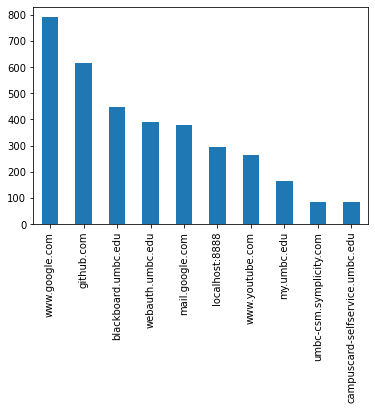

In [55]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [68]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     125
1      62
2     240
3     107
4      92
5       1
6       4
7      79
8      89
9     402
10    129
11    322
12    156
13    296
14    202
15    174
16    490
17    484
18    277
19    694
20    399
21    201
22      5
23    140
Name: domain, dtype: int64

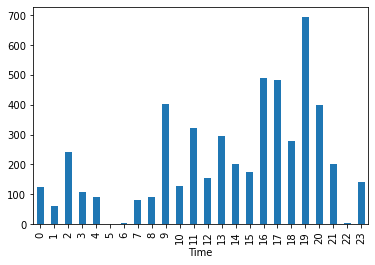

In [69]:
hourly_counts.plot.bar()

In [70]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-10-02 17:18:47,chrome.google.com,Saturday,5
1,2021-10-02 17:18:42,chrome.google.com,Saturday,5
2,2021-10-02 17:18:40,www.google.com,Saturday,5
3,2021-10-02 17:18:39,www.google.com,Saturday,5
4,2021-10-02 17:17:01,pypi.org,Saturday,5


In [71]:
df['Day'].value_counts()

Thursday     1039
Tuesday       970
Wednesday     851
Monday        740
Sunday        705
Friday        554
Saturday      311
Name: Day, dtype: int64

In [74]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     740
1     970
2     851
3    1039
4     554
5     311
6     705
Name: DayIndex, dtype: int64

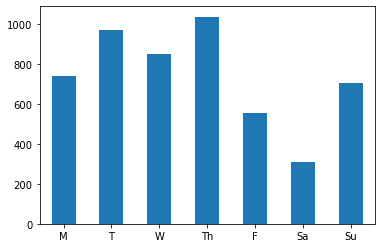

In [73]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [75]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-10-02 17:18:47,chrome.google.com,Saturday,5,True
1,2021-10-02 17:18:42,chrome.google.com,Saturday,5,True
2,2021-10-02 17:18:40,www.google.com,Saturday,5,True
3,2021-10-02 17:18:39,www.google.com,Saturday,5,True
4,2021-10-02 17:17:01,pypi.org,Saturday,5,True


In [76]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [77]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-10-02 17:18:47,chrome.google.com,Saturday,5,True
1,2021-10-02 17:18:42,chrome.google.com,Saturday,5,True
2,2021-10-02 17:18:40,www.google.com,Saturday,5,True
3,2021-10-02 17:18:39,www.google.com,Saturday,5,True
4,2021-10-02 17:17:01,pypi.org,Saturday,5,True


In [78]:
weekday['domain'].value_counts()[:5]

www.google.com         600
github.com             525
blackboard.umbc.edu    423
mail.google.com        374
webauth.umbc.edu       300
Name: domain, dtype: int64

In [79]:
weekend['domain'].value_counts()[:5]

www.google.com      191
www.youtube.com     108
github.com           92
webauth.umbc.edu     89
localhost:8888       88
Name: domain, dtype: int64

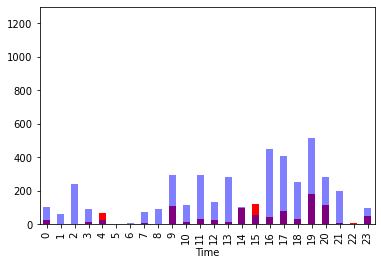

In [80]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

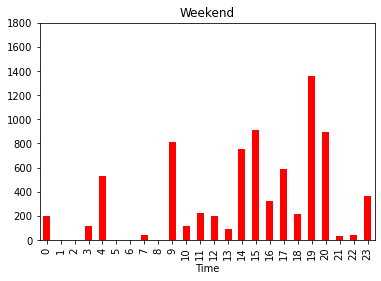

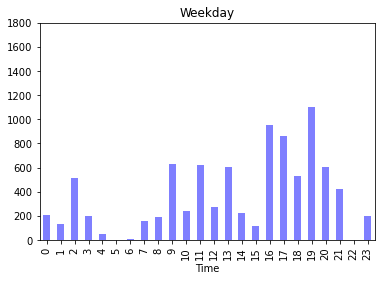

In [81]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [82]:
df['domain'].value_counts()[:50]

www.google.com                      791
github.com                          617
blackboard.umbc.edu                 446
webauth.umbc.edu                    389
mail.google.com                     379
localhost:8888                      294
www.youtube.com                     265
my.umbc.edu                         164
umbc-csm.symplicity.com              83
campuscard-selfservice.umbc.edu      83
my3.my.umbc.edu                      79
umbcstudents-md.safecolleges.com     77
commerce.cashnet.com                 76
highpoint-prd.ps.umbc.edu            74
web.whatsapp.com                     71
lucid.app                            59
stackoverflow.com                    58
cgifederal.secure.force.com          52
csprd-web.ps.umbc.edu                48
www.chess.com                        46
bookme.airindia.in                   45
www.linkedin.com                     44
www.w3schools.com                    34
umbc.och101.com                      32
ceac.state.gov                       31


In [83]:
df['domain'] = df['domain'].astype(str)

In [84]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

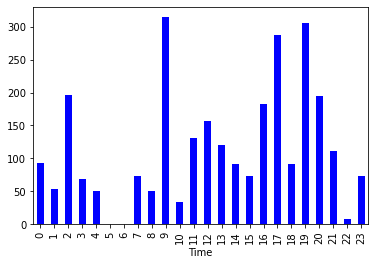

In [89]:
_= show_domain_stats('google', 'blue')

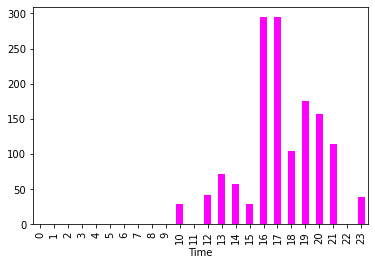

In [94]:
_ = show_domain_stats('localhost', 'magenta')

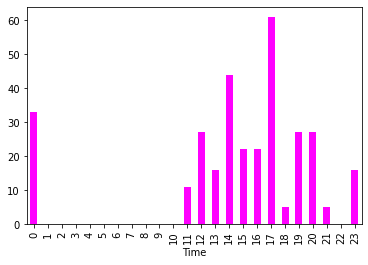

In [88]:
_ = show_domain_stats('stackover', 'magenta')


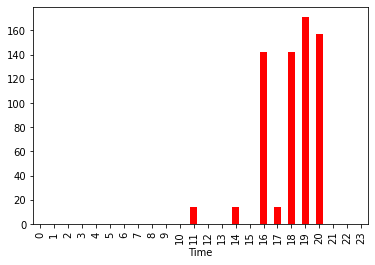

In [96]:
_ = show_domain_stats('chess', 'red')

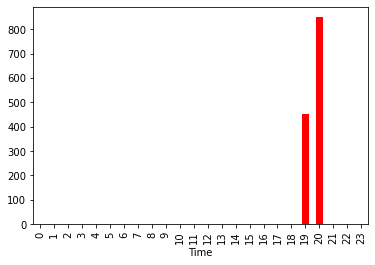

In [98]:
_ = show_domain_stats('expedia', 'red')

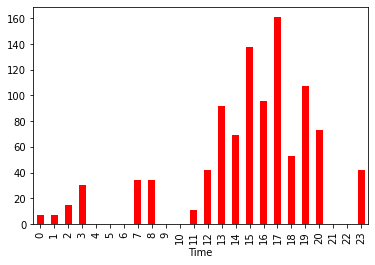

In [90]:
_ = show_domain_stats('youtube', 'red')


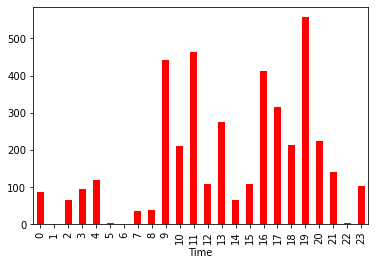

In [95]:
_ = show_domain_stats('umbc', 'red')

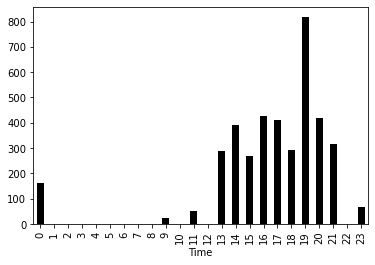

In [92]:
_=show_domain_stats('github', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here:
1. Personal computer
2. No, Student
3. Studying, playing chess.
4. may have made some travel plans in the past and uses google extensively for work and peronal usage.

### What do you think about this assignment? ( 3 sentences at most! ) 

answer here
everyone should do it.


__NOTE__: If you give your permission for another student to analyze your `history_cleaned.csv` please commit it with this hw file.

(Your name will stay confidencial)

permission given